In [6]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

Beginning Data Retrieval
------------------------


In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#print(coordinates)
len(coordinates)

1500

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [10]:
# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | high level
Processing Record 5 of Set 1 | sladkovo
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | grindavik
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | bonthe
Processing Record 14 of Set 1 | goundam
Processing Record 15 of Set 1 | fare
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | victoria point
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | saleaula
City not found. Skipping...
Processing Record 22 of Set 1 | noumea
Processing Record

Processing Record 42 of Set 4 | dinga
Processing Record 43 of Set 4 | moiyabana
City not found. Skipping...
Processing Record 44 of Set 4 | abha
Processing Record 45 of Set 4 | azimur
City not found. Skipping...
Processing Record 46 of Set 4 | yamada
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | port-gentil
Processing Record 50 of Set 4 | chaves
Processing Record 1 of Set 5 | yarada
Processing Record 2 of Set 5 | laguna
Processing Record 3 of Set 5 | komsomolskiy
Processing Record 4 of Set 5 | lavrentiya
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | akdepe
Processing Record 7 of Set 5 | fortuna
Processing Record 8 of Set 5 | half moon bay
Processing Record 9 of Set 5 | januaria
Processing Record 10 of Set 5 | concordia
Processing Record 11 of Set 5 | peniche
Processing Record 12 of Set 5 | nanchong
Processing Record 13 of Set 5 | ugra
Processing Record 14 of Set 5 |

Processing Record 32 of Set 8 | at-bashi
Processing Record 33 of Set 8 | chernaya kholunitsa
Processing Record 34 of Set 8 | beawar
Processing Record 35 of Set 8 | kilakarai
Processing Record 36 of Set 8 | sarangani
Processing Record 37 of Set 8 | kalanguy
Processing Record 38 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 8 | hithadhoo
Processing Record 40 of Set 8 | olyka
Processing Record 41 of Set 8 | krasnoselkup
Processing Record 42 of Set 8 | mangrol
Processing Record 43 of Set 8 | sinnamary
Processing Record 44 of Set 8 | saint-joseph
Processing Record 45 of Set 8 | lepley
Processing Record 46 of Set 8 | burica
City not found. Skipping...
Processing Record 47 of Set 8 | foshan
Processing Record 48 of Set 8 | college
Processing Record 49 of Set 8 | novyy urengoy
Processing Record 50 of Set 8 | araouane
Processing Record 1 of Set 9 | goderich
Processing Record 2 of Set 9 | fershampenuaz
Processing Record 3 of Set 9 | amol
Processing Record 4 of Se

Processing Record 17 of Set 12 | san jose
Processing Record 18 of Set 12 | gazojak
Processing Record 19 of Set 12 | pandan
Processing Record 20 of Set 12 | umm lajj
Processing Record 21 of Set 12 | asyut
Processing Record 22 of Set 12 | salinopolis
Processing Record 23 of Set 12 | lakes entrance
Processing Record 24 of Set 12 | ahuimanu
Processing Record 25 of Set 12 | kushima
Processing Record 26 of Set 12 | villa carlos paz
Processing Record 27 of Set 12 | lohja
Processing Record 28 of Set 12 | fairbanks
Processing Record 29 of Set 12 | manavalakurichi
Processing Record 30 of Set 12 | havre-saint-pierre
Processing Record 31 of Set 12 | mae sot
Processing Record 32 of Set 12 | namuac
Processing Record 33 of Set 12 | chiang klang
Processing Record 34 of Set 12 | do gonbadan
Processing Record 35 of Set 12 | male
Processing Record 36 of Set 12 | sol-iletsk
Processing Record 37 of Set 12 | toulepleu
City not found. Skipping...
Processing Record 38 of Set 12 | kampot
Processing Record 39 o

In [11]:
len(city_data)

554

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-10-27 00:24:17,-42.88,147.33,57.99,58,75,8.05
1,Tuktoyaktuk,CA,2020-10-27 00:24:17,69.45,-133.04,10.40,85,40,16.11
2,High Level,CA,2020-10-27 00:24:17,58.52,-117.14,26.60,63,90,11.41
3,Sladkovo,RU,2020-10-27 00:24:17,55.53,70.34,42.71,83,100,10.49
4,Mataura,NZ,2020-10-27 00:24:17,-46.19,168.86,55.99,65,86,5.01
5,Grindavik,IS,2020-10-27 00:24:17,63.84,-22.43,39.20,80,90,19.46
6,Alofi,NU,2020-10-27 00:24:18,-19.06,-169.92,78.80,74,75,17.22
7,Cape Town,ZA,2020-10-27 00:19:53,-33.93,18.42,64.00,87,0,6.93
8,Jamestown,US,2020-10-27 00:21:20,42.10,-79.24,45.00,93,90,3.36
9,Ponta Do Sol,PT,2020-10-27 00:24:18,32.67,-17.10,66.20,68,40,14.99


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module
import time
# Get today's date in seconds
today = time.strftime("%x")
today

'10/26/20'

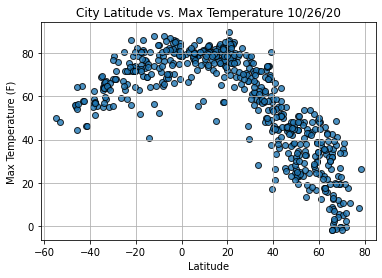

In [21]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig1.png")

#Show plot
plt.show()

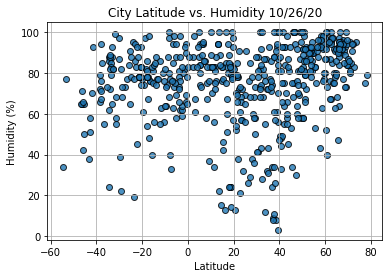

In [22]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig2.png")

#Show plot
plt.show()

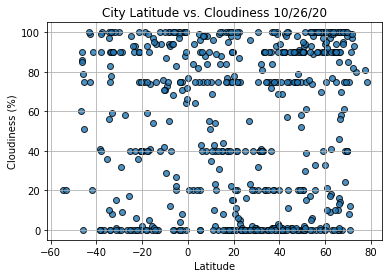

In [23]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig3.png")

#Show plot
plt.show()